In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N40, Olisthesis L5-S1, M, 15 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N10,S,63,F_1003_2.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N21, Olisthesis L5-S1, F, 54 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N25, Olisthesis L4-5, F, 50 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N11, Olisthesis. L4-5, M, 48 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N41,S,54,M_1_0.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N13, Olisthesis L4-5, F, 60 yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N23,S,78,M_1001_0.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N6, Olisthesis L4-5, F, 60 Yrs.jpg
/kaggle/input/the-vertebrae-xray-images/xkt857dsxk-1/331/331/Spond/N14, Olisthesis L4-5, M, 48 Yrs.jpg
/kaggle/input

In [2]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import shutil
import pathlib
import itertools
import numpy as np 
import pandas as pd 
# import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [3]:
base_path = r"C:\Users\win 11\Downloads\archive (1)\xkt857dsxk-1\331\331"

In [4]:
# List to store image metadata
metadata = []

# Define the class names (subfolders)
classes = ['Normal', 'Scol', 'Spond']
image_counts = {}

# Loop through the class folders (Normal, Scol, Spond)
for class_name in classes:
    class_folder_path = os.path.join(base_path, class_name)

    # Check if the folder exists and process its images
    if os.path.exists(class_folder_path):
        image_files = [f for f in os.listdir(class_folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))]

        # Count the number of images in the class
        image_counts[class_name] = len(image_files)

        # Collect metadata for each image
        for image_file in image_files:
            image_path = os.path.join(class_folder_path, image_file)
            try:
                img = Image.open(image_path)
                metadata.append({
                    'Filename': image_file,
                    'Class': class_name,
                    'Format': img.format,
                    'Size': img.size,
                    'Mode': img.mode,
                    'Width': img.width,
                    'Height': img.height
                })
            except Exception as e:
                print(f"Error opening {image_file}: {e}")

In [5]:
# Convert metadata to pandas DataFrame
metadata_df = pd.DataFrame(metadata)

# Display the first few rows of the metadata
metadata_df.head()

,Filename,Class,Format,Size,Mode,Width,Height
0,"N1,N,40,M_1_0.jpg",Normal,JPEG,"(331, 331)",RGB,331,331
1,"N1,N,F,21_1_0.jpg",Normal,JPEG,"(331, 331)",RGB,331,331
2,"N11,N,F,26_1_0.jpg",Normal,JPEG,"(331, 331)",RGB,331,331
3,"N12,N,F,14_1_0.jpg",Normal,JPEG,"(331, 331)",RGB,331,331
4,"N12,N,M,13_1_0.jpg",Normal,JPEG,"(331, 331)",RGB,331,331


In [6]:
# Create a DataFrame for image counts per class
df_counts = pd.DataFrame(list(image_counts.items()), columns=['Class', 'ImageCount'])

# Display image counts per class
df_counts

,Class,ImageCount
0,Normal,71
1,Scol,185
2,Spond,78


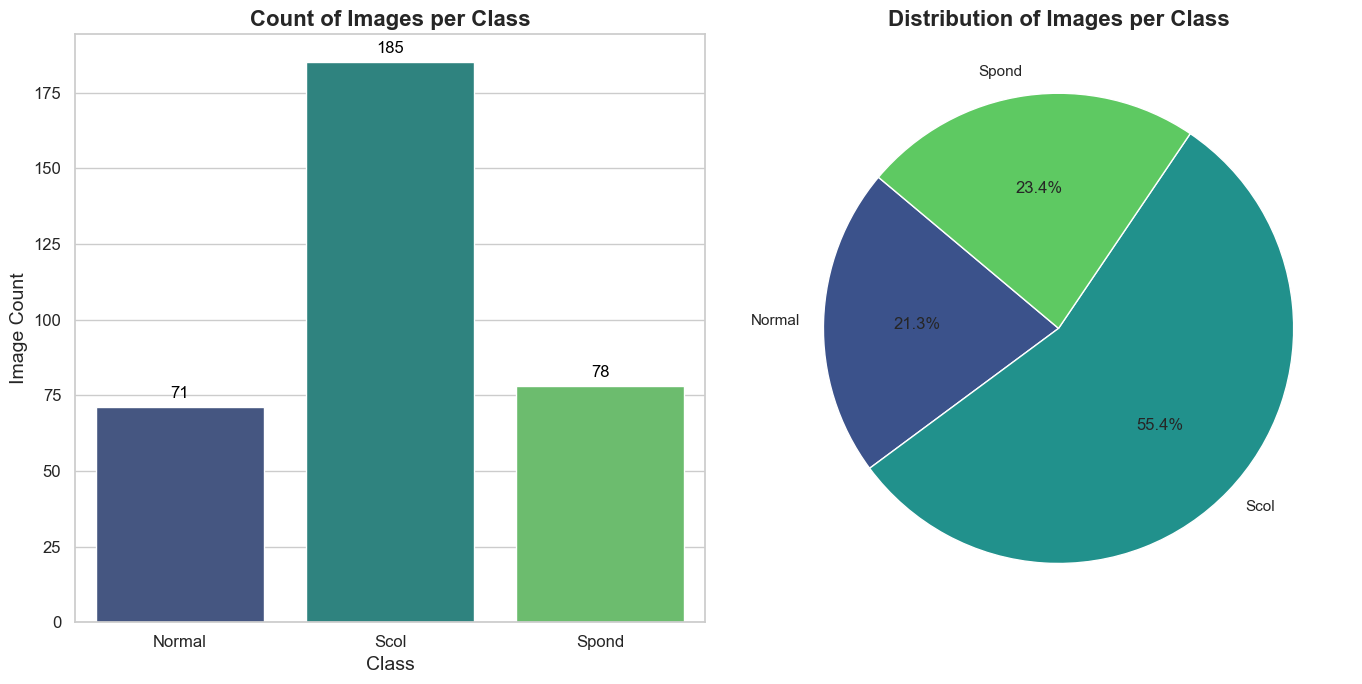

In [7]:
# Set the style of seaborn for a "clean" and modern look
sns.set(style="whitegrid")

# Create a figure with a larger size
plt.figure(figsize=(14, 7))

# Plot 1: Barplot of Image Counts per Class
plt.subplot(1, 2, 1)
barplot = sns.barplot(data=df_counts, x='Class', y='ImageCount', palette="viridis")

# Add value labels on top of the bars
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():,.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     fontsize=12, color='black',
                     xytext=(0, 10), textcoords='offset points')

plt.title('Count of Images per Class', fontsize=16, weight='bold')
plt.xlabel('Class', fontsize=14)
plt.ylabel('Image Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot 2: Pie Chart of Image Distribution per Class
plt.subplot(1, 2, 2)
plt.pie(df_counts['ImageCount'], labels=df_counts['Class'], autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("viridis", n_colors=len(df_counts)))
plt.title('Distribution of Images per Class', fontsize=16, weight='bold')

# Add a shadow effect to the pie chart
plt.gca().set_aspect('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.tight_layout()

# Show the plot
plt.show()


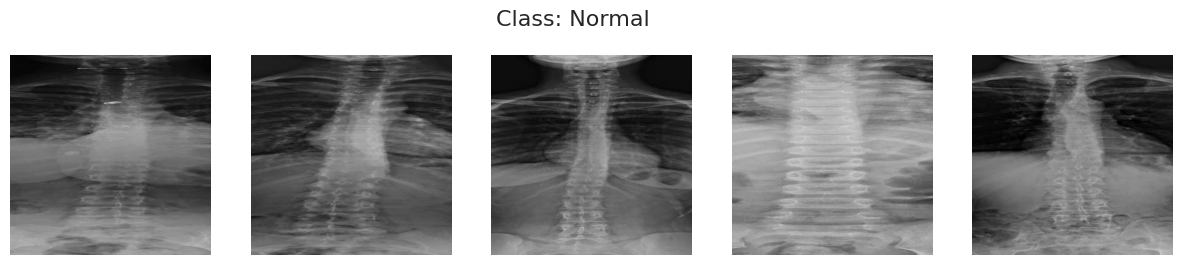

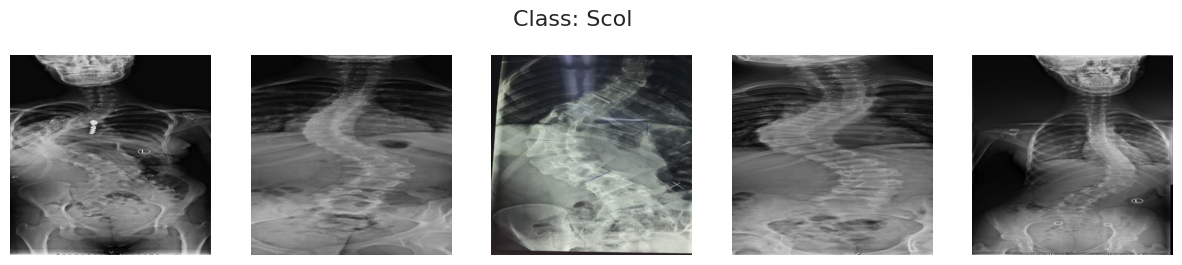

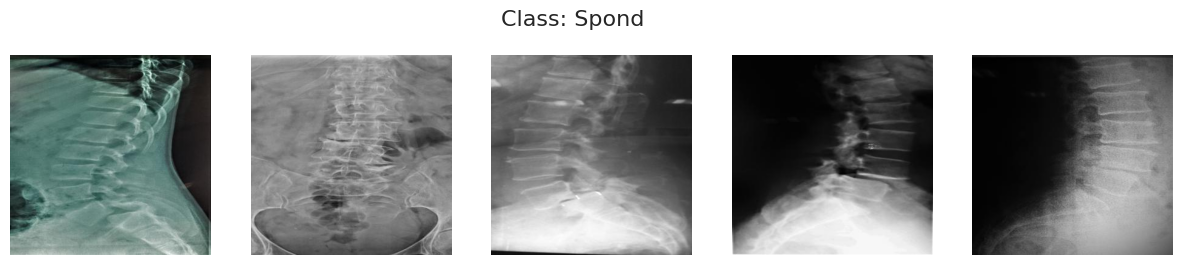

In [8]:
for class_name in classes:
    folder_path = os.path.join(base_path, class_name)
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg'))][:5]  # Get first 5 images

    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)

    for i, image_file in enumerate(image_files):
        image_path = os.path.join(folder_path, image_file)
        image = Image.open(image_path)

        plt.subplot(1, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.axis('off')

    plt.show()

In [8]:
image_data = []

folders = {'Normal': 1, 'Scol': 2, 'Spond': 3}

for folder_name, label in folders.items():
    folder_path = os.path.join(base_path, folder_name)

    if os.path.exists(folder_path):
        image_files = os.listdir(folder_path)

        for image_file in image_files:
            image_data.append((os.path.join(folder_path, image_file), label))
    else:
        print(f"Folder {folder_path} not found.")

data= pd.DataFrame(image_data, columns=['image_path', 'label'])

In [9]:
data

,image_path,label
0,C:\Users\win 11\Downloads\archive (1)\xkt857ds...,1
1,C:\Users\win 11\Downloads\archive (1)\xkt857ds...,1
2,C:\Users\win 11\Downloads\archive (1)\xkt857ds...,1
3,C:\Users\win 11\Downloads\archive (1)\xkt857ds...,1
4,C:\Users\win 11\Downloads\archive (1)\xkt857ds...,1
...,...,...
333,C:\Users\win 11\Downloads\archive (1)\xkt857ds...,3
334,C:\Users\win 11\Downloads\archive (1)\xkt857ds...,3
335,C:\Users\win 11\Downloads\archive (1)\xkt857ds...,3
336,C:\Users\win 11\Downloads\archive (1)\xkt857ds...,3


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338 entries, 0 to 337
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image_path  338 non-null    object
 1   label       338 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


In [11]:
data.shape

(338, 2)

In [12]:
data.columns

Index(['image_path', 'label'], dtype='object')

In [13]:
data.isnull().sum()

image_path    0
label         0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data["label"].unique()

array([1, 2, 3], dtype=int64)

In [16]:
data['label'].value_counts()

label
2    188
3     79
1     71
Name: count, dtype: int64

In [17]:
data['label'] = data['label'].astype(str)

## Split the original dataset (data) into a training set (train_data_new) and a temporary set (temp_data_new), which will later be divided into validation and test sets.

In [18]:
train_data_new, temp_data_new = train_test_split(
    data,
    train_size=0.8,
    shuffle=True,
    random_state=42,
    stratify=data['label']   #Ensures the class distribution in the label column is preserved in both subsets.
)

valid_data_new, test_data_new = train_test_split(
    temp_data_new,
    test_size=0.5,
    shuffle=True,
    random_state=42,
    stratify=temp_data_new['label']   #Ensures that the class distribution in the label column is preserved in both the training set (train_data_new) and the temporary data set (temp_data_new).
)

In [19]:
train_data_new.shape

(270, 2)

In [20]:
temp_data_new.shape

(68, 2)

In [21]:
valid_data_new.shape

(34, 2)

In [22]:
test_data_new.shape

(34, 2)

## DATA augmantation

In [23]:
from imblearn.over_sampling import RandomOverSampler
#The RandomOverSampler duplicates samples from minority classes (randomly selected)
#until all classes have the same number of samples as the majority class.

#Reshaped to 2D (.reshape(-1, 1)) because RandomOverSampler requires the input to have at least 2 dimensions.
X = train_data_new['image_path'].values.reshape(-1, 1)

y = train_data_new['label'].values

#Duplicates samples from the minority classes until all classes have the same number of instances as the majority class.
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

balanced_train_data = pd.DataFrame({
    'image_path': X_resampled.flatten(),
    'label': y_resampled
})

print("Class distribution after oversampling:")
print(balanced_train_data['label'].value_counts())

Class distribution after oversampling:
label
3    150
2    150
1    150
Name: count, dtype: int64


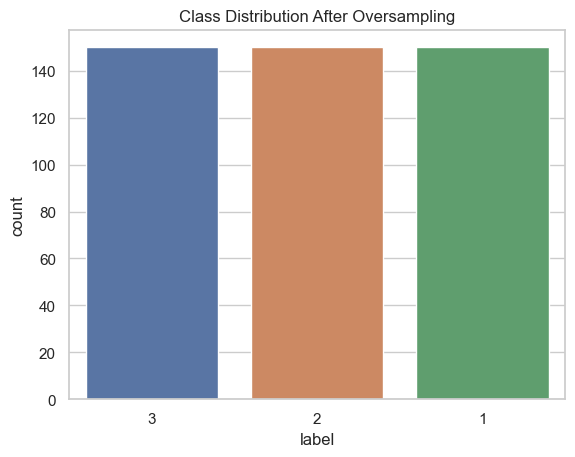

In [24]:
sns.countplot(data=balanced_train_data, x='label')
plt.title("Class Distribution After Oversampling")
plt.show()


In [25]:
balanced_train_data.shape

(450, 2)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 16
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)
ts_gen = ImageDataGenerator(rescale=1./255)

#This method generates batches of image data directly from a pandas DataFrame
train_gen_new = tr_gen.flow_from_dataframe(
    balanced_train_data,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_data_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_data_new,
    x_col='image_path',
    y_col='label',
    target_size=img_size,
    class_mode='sparse',
    color_mode='rgb',
    shuffle=False,    #shuffle=False is used for the test generator to ensure that predictions align with the original order of test images.
    batch_size=batch_size
)

Found 450 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.
Found 34 validated image filenames belonging to 3 classes.


In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)), 
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    # Dropout(0.5),
    Dense(3, activation='softmax')  # Adjust '10' to match your number of classes
])

early_stopping = EarlyStopping(
    monitor='val_loss',      # Metric to monitor
    patience=5,              # Number of epochs to wait for improvement
    restore_best_weights=True # Restore best weights after stopping
)

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',  
                  metrics=['accuracy'])

# Check model summary (optional)
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 186624)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      23,888,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,907,779 (91.20 MB)

 Trainable params: 23,907,779 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
keras_model = cnn_model.fit(
    train_gen_new,  # Training data (image arrays, labels)
    validation_data=valid_gen_new,  # Validation data
    epochs=10,  # Number of training epochs
    batch_size=32,# Batch size
    callbacks=[early_stopping]
)


Epoch 1/10


I0000 00:00:1734185902.789789   33441 service.cc:145] XLA service 0x78f390004dd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734185902.789853   33441 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734185902.789857   33441 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 5/29 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.1492 - loss: 6.3941   

I0000 00:00:1734185907.007208   33441 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 119ms/step - accuracy: 0.3346 - loss: 4.1474 - val_accuracy: 0.7353 - val_loss: 0.6481
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.8633 - loss: 0.4206 - val_accuracy: 0.7647 - val_loss: 0.4616
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9232 - loss: 0.1800 - val_accuracy: 0.7941 - val_loss: 0.4174
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9519 - loss: 0.1213 - val_accuracy: 0.9118 - val_loss: 0.2653
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9912 - loss: 0.0484 - val_accuracy: 0.8529 - val_loss: 0.5044
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9948 - loss: 0.0379 - val_accuracy: 0.8529 - val_loss: 0.4325
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9968 - loss: 0.0309 - val_accuracy: 0.9706 - val_loss: 0.1968
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9955 - loss: 0.0117 - val_accuracy: 0.8824 - val_loss: 0

In [30]:
#  Evaluate the model with the processed images
val_loss, val_accuracy = cnn_model.evaluate(valid_gen_new)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9619 - loss: 0.2413
Validation Loss: 0.19680988788604736
Validation Accuracy: 0.970588207244873


In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = cnn_model.evaluate(test_gen_new)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9324 - loss: 0.6021
Test Loss: 0.7744432687759399
Test Accuracy: 0.9117646813392639


In [32]:
keras_model.history

{'accuracy': [0.48222222924232483,
  0.8666666746139526,
  0.9444444179534912,
  0.948888897895813,
  0.9888888597488403,
  0.9844444394111633,
  0.9977777600288391,
  0.9977777600288391,
  1.0,
  1.0],
 'loss': [2.371464729309082,
  0.35828498005867004,
  0.14283141493797302,
  0.13712723553180695,
  0.03794833645224571,
  0.05938573554158211,
  0.02363387867808342,
  0.010739787481725216,
  0.0039364988915622234,
  0.0013199914246797562],
 'val_accuracy': [0.7352941036224365,
  0.7647058963775635,
  0.7941176295280457,
  0.9117646813392639,
  0.8529411554336548,
  0.8529411554336548,
  0.970588207244873,
  0.8823529481887817,
  0.9117646813392639,
  0.9411764740943909],
 'val_loss': [0.6480658650398254,
  0.4615820050239563,
  0.417447566986084,
  0.26529738306999207,
  0.5044408440589905,
  0.43254777789115906,
  0.19680990278720856,
  0.3652562201023102,
  0.2940756678581238,
  0.2704382538795471]}

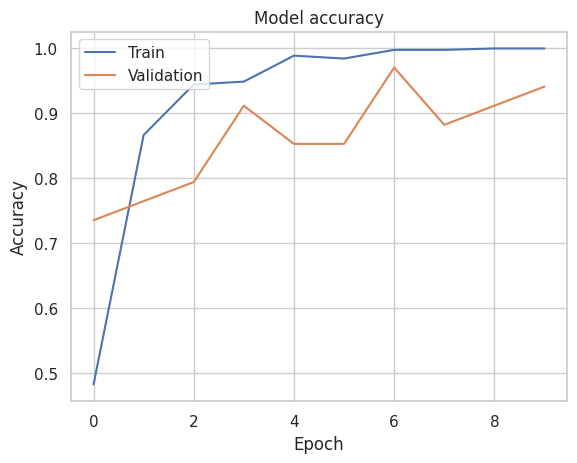

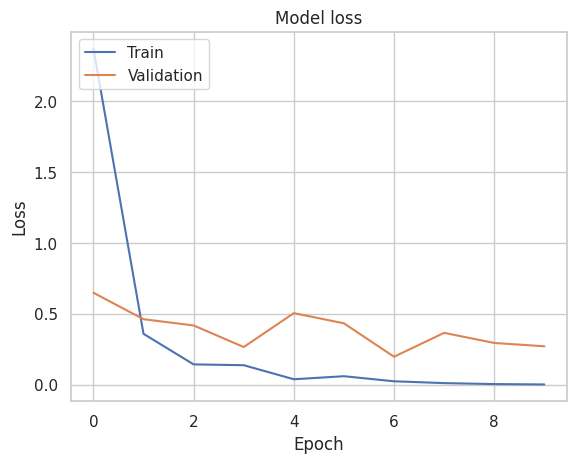

In [33]:
plt.plot(keras_model.history['accuracy'])
plt.plot(keras_model.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(keras_model.history['loss'])
plt.plot(keras_model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
test_labels = test_gen_new.classes
predictions = cnn_model.predict(test_gen_new)
#Each row contains the predicted probabilities for all classes.
predicted_classes = np.argmax(predictions, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


In [35]:
report = classification_report(test_labels, predicted_classes, target_names=list(test_gen_new.class_indices.keys()))
print(report)

              precision    recall  f1-score   support

           1       0.83      0.71      0.77         7
           2       0.90      1.00      0.95        19
           3       1.00      0.88      0.93         8

    accuracy                           0.91        34
   macro avg       0.91      0.86      0.88        34
weighted avg       0.91      0.91      0.91        34



In [36]:
conf_matrix = confusion_matrix(test_labels, predicted_classes)

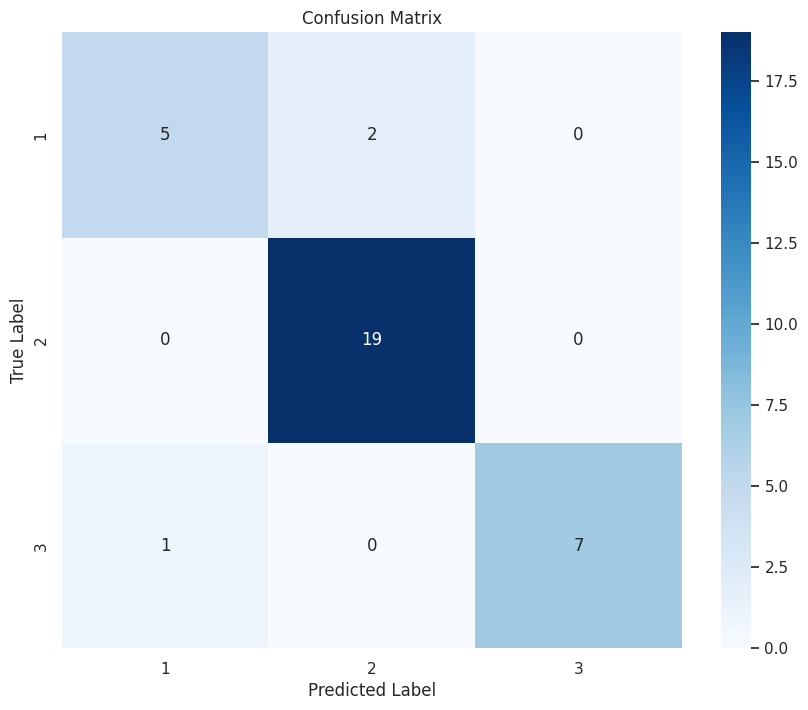

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=list(test_gen_new.class_indices.keys()), yticklabels=list(test_gen_new.class_indices.keys()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

VGG16 pretrained model

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Load the VGG16 model pre-trained on ImageNet dataset without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model so they are not trained
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top for your specific task
x = base_model.output   #
x = GlobalAveragePooling2D()(x)  # Global pooling layer
x = Dropout(0.5)(x)  # Dropout for regularization prevent overfitting 
x = Dense(1024, activation='relu')(x)  # Fully connected layer
predictions = Dense(3, activation='softmax')(x)  

# Define the full model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 45s 1us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │              

 Total params: 15,243,075 (58.15 MB)

 Trainable params: 528,387 (2.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [52]:
history = model.fit(
    train_gen_new,
    epochs=10,
    validation_data=valid_gen_new,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.4388 - loss: 1.3885 - val_accuracy: 0.7941 - val_loss: 0.5879
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.7696 - loss: 0.6009 - val_accuracy: 0.7647 - val_loss: 0.5137
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7836 - loss: 0.5635 - val_accuracy: 0.7941 - val_loss: 0.4300
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8415 - loss: 0.4415 - val_accuracy: 0.7941 - val_loss: 0.3936
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.8101 - loss: 0.5104 - val_accuracy: 0.8235 - val_loss: 0.3730
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.8824 - loss: 0.3631 - val_accuracy: 0.8235 - val_loss: 0.3574
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.8567 - loss: 0.3555 - val_accuracy: 0.8235 - val_loss: 0.3439
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.8582 - loss: 0.4102 - val_accuracy: 0.8824 - 

In [53]:
# Unfreeze the top layers of the pre-trained model for fine-tuning
for layer in base_model.layers[-6:]:  # Unfreeze the last 6 layers
    layer.trainable = True

# Re-compile the model after unfreezing the layers
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate for fine-tuning
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Continue training the model
history_fine = model.fit(
    train_gen_new,
    epochs=10,
    validation_data=valid_gen_new,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.7056 - loss: 1.0180 - val_accuracy: 0.9118 - val_loss: 0.2390
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9001 - loss: 0.2366 - val_accuracy: 0.9412 - val_loss: 0.1869
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9427 - loss: 0.1297 - val_accuracy: 0.8824 - val_loss: 0.3676
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9083 - loss: 0.3013 - val_accuracy: 0.9412 - val_loss: 0.1042
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9830 - loss: 0.0409 - val_accuracy: 0.9412 - val_loss: 0.1055
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.9879 - loss: 0.0475 - val_accuracy: 1.0000 - val_loss: 0.0224
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9947 - loss: 0.0303 - val_accuracy: 1.0000 - val_loss: 0.0238
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9876 - loss: 0.0371 - val_accuracy: 1

In [54]:
test_loss, test_accuracy = model.evaluate(test_gen_new)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.9324 - loss: 0.4333
Test Accuracy: 91.18%


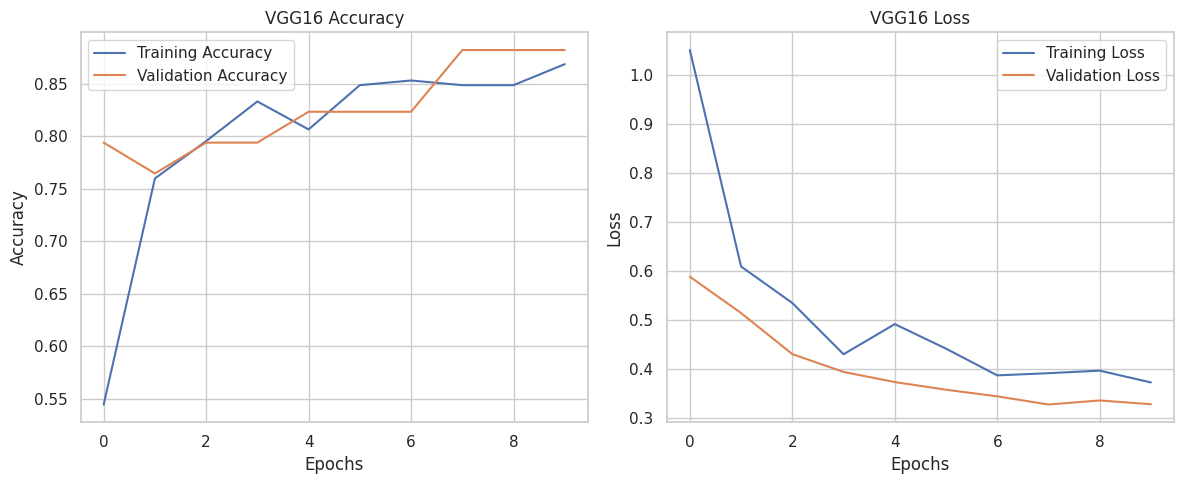

In [55]:
import matplotlib.pyplot as plt

# Assuming you already have the 'history' object from model.fit()
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


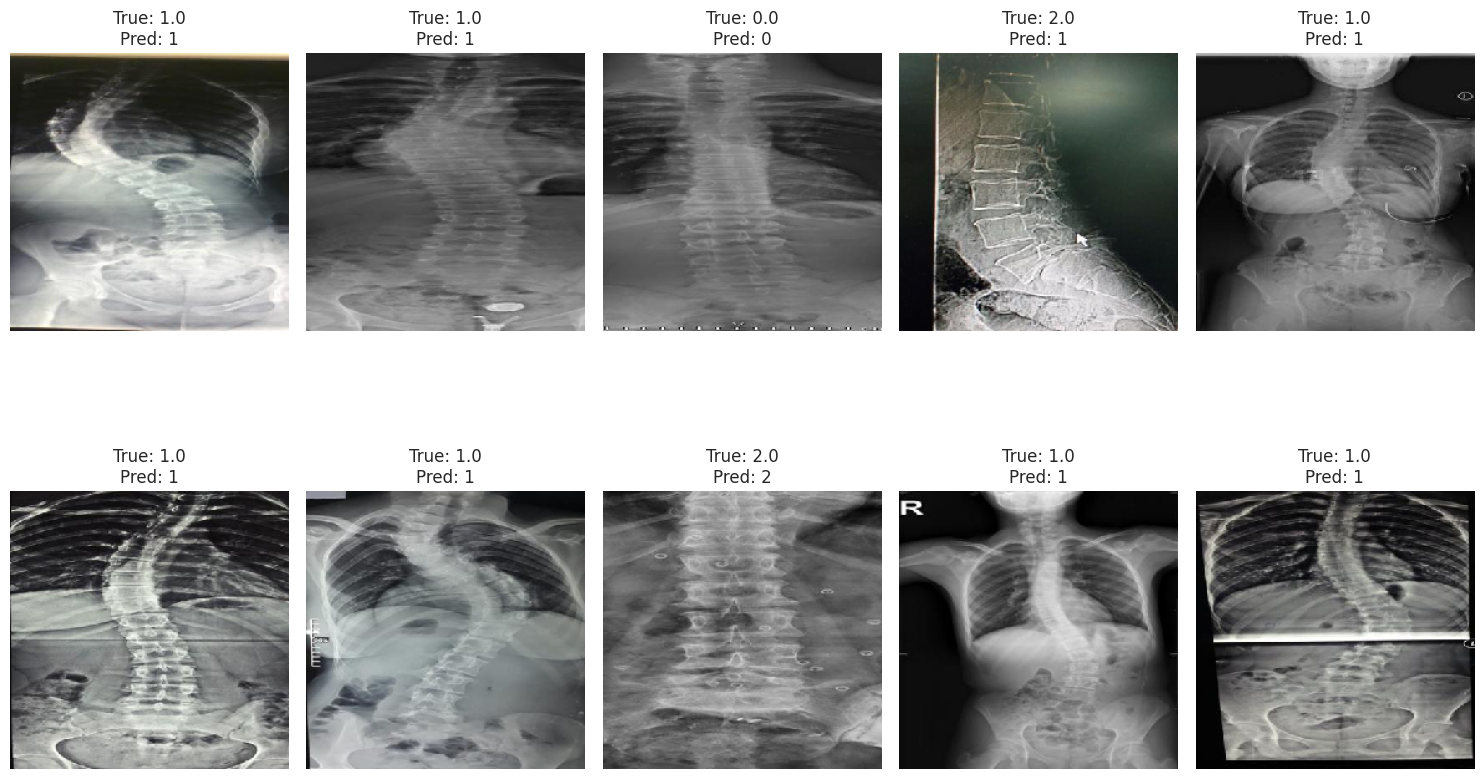

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'test_gen_new' is your data generator and 'final_model' is the trained VGG16 model
data_batch = next(iter(test_gen_new))
images, labels = data_batch
predictions = final_model.predict(images)

plt.figure(figsize=(15, 10))
for i in range(10):  # Displaying first 10 images
    plt.subplot(2, 5, i + 1)
    plt.imshow(images[i])
    true_label = labels[i]
    predicted_label = np.argmax(predictions[i])
    plt.title(f'True: {true_label}\nPred: {predicted_label}')
    plt.axis('off')
plt.tight_layout()
plt.show()
